<a href="https://colab.research.google.com/github/anagdesa/Basic-of-Python-for-Data-Science/blob/main/K-Mean_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Individu Pertemuan 13**

Gramandha Wega Intyanto (05124873151-29)


Soal Tugas


1. Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan data set yang diberikan buatlah analisa:
  * a. gunakan kolom ke 2 hingga 4 sebagai input features
  * b. dengan metode elbow, analisa jumlah cluster yang tepat
  * c. gunakan K-Means clustering dan analisa hasilnya
2. Sebuah department store ingin menganalisa kelompok perilaku belanja dari pelanggannya, dengan data set yang diberikan buatlah analisa:
	* a. gunakan kolom ke 2 hingga 4 sebagai input features
	* b. dengan dendogram diagram, analisa jumlah cluster yang tepat
	* c. gunakan Hierachical clustering dan analisa hasilnya
	* d. bandingkan hasilnya dengan menggunakan metode K-Means
3. Generate data set sebanyak 500 titik data pelatihan bola dengan label yang sesuai
	* a. lakukan normalisasi fitur pada proses pelatihan data,
	* b. gunakan DBSCAN dari library sklearn
	* c. buatlah untuk kasus spherical dan non-spherical data
	* d. Pada kasus non-spherical data, uji coba dengan metode K-Means dan bandingkan hasilnya

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Jawaban nomer 1

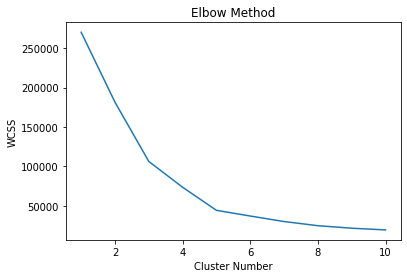

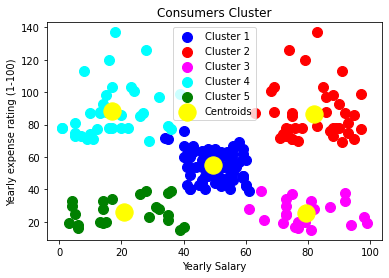

[[49.51851852 55.2962963 ]
 [82.12820513 86.53846154]
 [79.36363636 25.72727273]
 [17.11428571 88.2       ]
 [20.91304348 26.30434783]]
Jumlah anggota pada cluster 1 yaitu  81
Jumlah anggota pada cluster 2 yaitu  39
Jumlah anggota pada cluster 3 yaitu  22
Jumlah anggota pada cluster 4 yaitu  35
Jumlah anggota pada cluster 5 yaitu  23


In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# jawaban a (featur yang saya gunakan) 
# Mengimpor dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digital talent/tugas individu/Pertemuan 13/Customer.csv')
X = dataset.iloc[:, [3, 4]].values

# jawaban b 
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()
 
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

print(kmeans.cluster_centers_)
print('Jumlah anggota pada cluster 1 yaitu ', len(X[y_kmeans == 0, 0]))
print('Jumlah anggota pada cluster 2 yaitu ', len(X[y_kmeans == 1, 0]))
print('Jumlah anggota pada cluster 3 yaitu ', len(X[y_kmeans == 2, 0]))
print('Jumlah anggota pada cluster 4 yaitu ', len(X[y_kmeans == 3, 0]))
print('Jumlah anggota pada cluster 5 yaitu ', len(X[y_kmeans == 4, 0]))

In [ ]:
dataset.head(5)

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


# Jawaban nomer 2

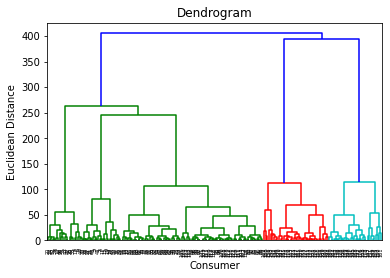

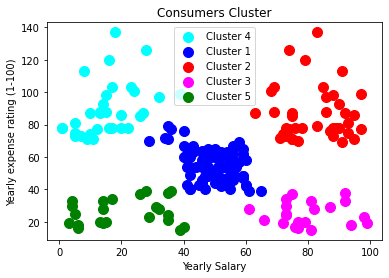

Jumlah anggota pada cluster 4 yaitu  32
Jumlah anggota pada cluster 1 yaitu  85
Jumlah anggota pada cluster 2 yaitu  39
Jumlah anggota pada cluster 3 yaitu  21
Jumlah anggota pada cluster 5 yaitu  23


In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 

# Mengimpor dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digital talent/tugas individu/Pertemuan 13/Customer.csv')
X = dataset.iloc[:, [3, 4]].values
 
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()
 
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

print('Jumlah anggota pada cluster 4 yaitu ', len(X[y_hc == 0, 0]))
print('Jumlah anggota pada cluster 1 yaitu ', len(X[y_hc == 1, 0]))
print('Jumlah anggota pada cluster 2 yaitu ', len(X[y_hc == 2, 0]))
print('Jumlah anggota pada cluster 3 yaitu ', len(X[y_hc == 3, 0]))
print('Jumlah anggota pada cluster 5 yaitu ', len(X[y_hc == 4, 0]))

# Jawaban nomer 3

kasus spherical

Estimated number of clusters: 3
Estimated number of noise points: 20
Homogeneity: 0.939
Completeness: 0.844
V-measure: 0.889
Adjusted Rand Index: 0.927
Adjusted Mutual Information: 0.888
Silhouette Coefficient: 0.605


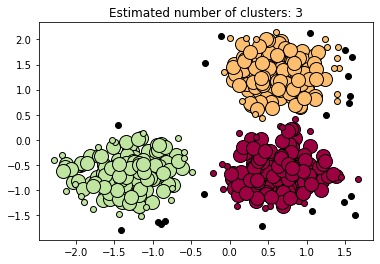

In [50]:
#Penerapan DBSCAN pada cluster spherical data.

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Menghitung DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

non-spherical data

Number of clusters: 2
Homogeneity: 0.9999999999999993
Completeness: 0.9552111475592987
V-measure: 0.977
Adjusted Rand Index: 0.988
Adjusted Mutual Information: 0.977
Silhouette Coefficient: 0.146


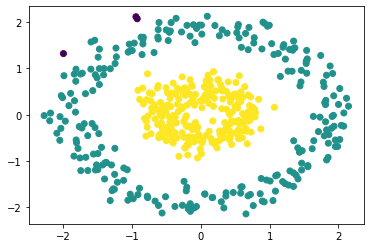

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=3).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" 
      % metrics.v_measure_score(y, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, y_pred))

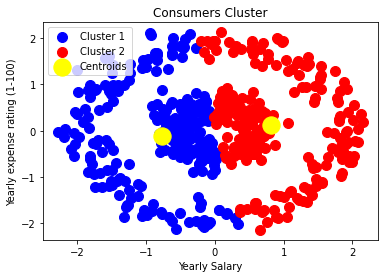

In [53]:
# jawaban d, kondisi number of cluster 3
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Cluster Number')
# plt.ylabel('WCSS')
# plt.show()
 
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()